In [1]:
import sys
import os

sys.path.append(os.path.abspath('/home/kali/Desktop/git/Financial-News-and-Stock-Price-Integration/scripts'))

In [2]:
from eda import *

In [3]:
# Load the dataset
df = load_data('/home/kali/Desktop/git/Financial-News-and-Stock-Price-Integration/Data/raw_analyst_ratings.csv')

In [4]:
# Descriptive Statistics
   #  Headline Length Statistics
headline_stats = calculate_headline_length(df)
print("Headline Length Statistics:\n", headline_stats)

Headline Length Statistics:
 count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


Articles per Publisher:
 publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


/home/kali/Desktop/git/Financial-News-and-Stock-Price-Integration/scripts/eda.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette='viridis')


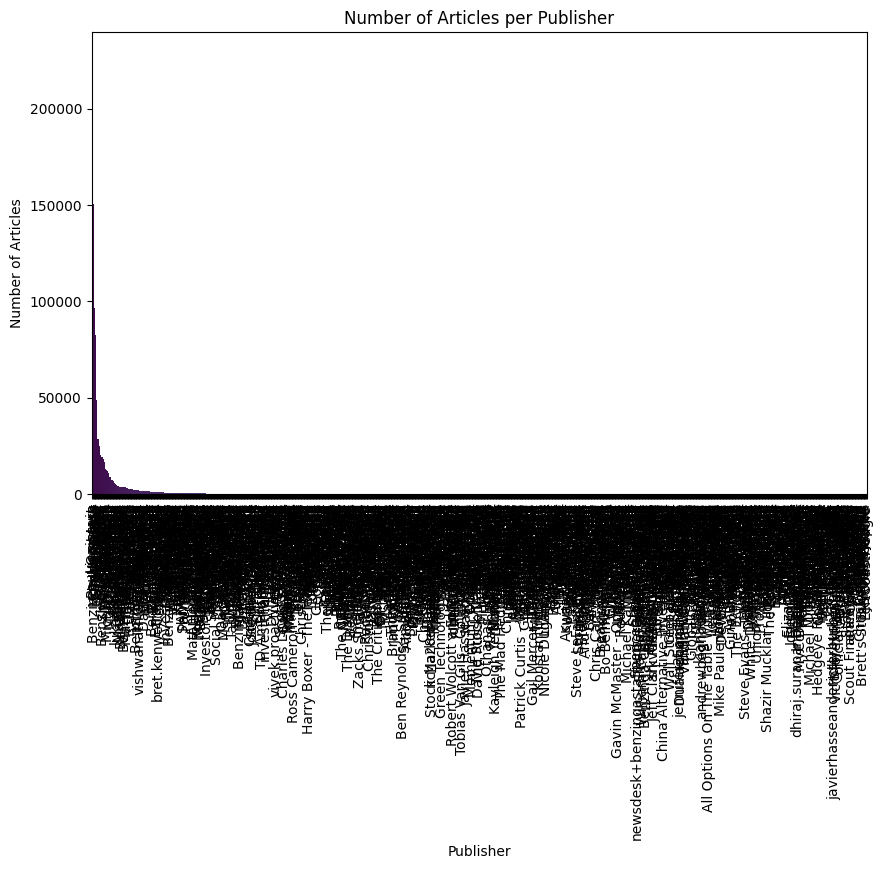

In [5]:
#  Count Articles per Publisher
publisher_counts = count_articles_per_publisher(df)
print("Articles per Publisher:\n", publisher_counts)
plot_bar(publisher_counts, 'Number of Articles per Publisher', 'Publisher', 'Number of Articles')

In [ ]:
#  Analyze Publication Dates
publication_day_counts = analyze_publication_dates(df)
print("Publication Day Counts:\n", publication_day_counts)
plot_bar(publication_day_counts, 'Article Distribution by Day of the Week', 'Day', 'Number of Articles')

In [ ]:
# Text Analysis
# 1. Sentiment Analysis
sentiment_counts = perform_sentiment_analysis(df)
print("Sentiment Distribution:\n", sentiment_counts)
plot_bar(sentiment_counts, 'Sentiment Distribution', 'Sentiment', 'Number of Articles')

In [ ]:
# 2. Topic Modeling
lda_model, vectorizer = perform_topic_modeling(df, n_topics=5)
print("Topics Identified by LDA:")
print_topics(lda_model, vectorizer)

In [ ]:
# Time Series Analysis
# 1. Publication Frequency Over Time
publication_trends = publication_frequency_over_time(df)
plot_time_series(publication_trends, 'Publication Frequency Over Time', 'Date', 'Number of Articles')

In [ ]:
# 2. Publishing Times Analysis
publishing_times = analyze_publishing_times(df)
plot_line(publishing_times, 'Publication Frequency by Hour', 'Hour of Day', 'Number of Articles')

In [ ]:
# Publisher Analysis
# 1. Publisher Domains Analysis
domain_counts = analyze_publisher_domains(df)
print("Publisher Domain Counts:\n", domain_counts)
plot_bar(domain_counts, 'Publisher Domain Contribution', 'Domain', 'Number of Articles')